In [42]:
import pandas as pd
import numpy as np


In [43]:
pip install openpyxl

# Data Loading (Fruits.xlsx)

In [44]:
fruits = pd.read_excel('C:/Users/Rehme/OneDrive/Documents/DATA/fruits.xlsx')
fruits.shape

(60, 4)

In [45]:
fruits.head(60)

,Color,Sphericity,Weight,labels
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange
5,Orange,0.911,130,Orange
6,Orange,0.903,135,Orange
7,Orange,0.918,105,Orange
8,Orange,0.914,132,Orange
9,Orange,0.936,127,Orange


# Identify the Features and Labels

In [46]:
fruits.labels.value_counts()

Orange    30
Apple     30
Name: labels, dtype: int64

In [47]:
fruits[['Sphericity','Weight']].describe()

,Sphericity,Weight
count,60.000000,60.000000
mean,0.820583,142.750000
std,0.067577,23.352585
min,0.710000,101.000000
25%,0.767250,124.000000
50%,0.823000,143.000000
75%,0.870500,164.000000
max,0.947000,184.000000


In [48]:
fruits.groupby('labels').describe()

Sphericity                                                             \
            count      mean       std    min     25%     50%      75%    max   
labels                                                                         
Apple        30.0  0.768133  0.042097  0.710  0.7285  0.7625  0.80250  0.845   
Orange       30.0  0.873033  0.042740  0.808  0.8350  0.8710  0.91325  0.947   

       Weight                                                             
        count        mean        std    min    25%    50%     75%    max  
labels                                                                    
Apple    30.0  161.966667  12.075862  140.0  152.5  164.0  171.50  184.0  
Orange   30.0  123.533333  14.129288  101.0  110.0  124.0  133.75  149.0

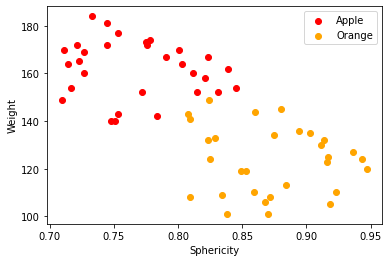

In [49]:
import matplotlib .pyplot as plt
plt.scatter(x='Sphericity',y='Weight',data=fruits[fruits.labels=='Apple'],c='red',label='Apple')
plt.scatter(x='Sphericity',y='Weight',data=fruits[fruits.labels=='Orange'],c='Orange',label='Orange')
# plt.plot([0.71,0.94],[140,140])
plt.xlabel('Sphericity')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [50]:
fruits.Color.value_counts()

Green              20
Orange             10
Greenish yellow    10
Reddish yellow     10
Red                10
Name: Color, dtype: int64

In [51]:
fruits.groupby(['Color','labels']).count()

Sphericity  Weight
Color           labels                    
Green           Apple           10      10
                Orange          10      10
Greenish yellow Orange          10      10
Orange          Orange          10      10
Red             Apple           10      10
Reddish yellow  Apple           10      10

In [52]:
x = fruits[['Sphericity','Weight']]
y = fruits['labels']

# Prepare the train and Test samples

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((45, 2), (15, 2), (45,), (15,))

# Training the Data model

In [54]:
# import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# create an object of the Classifier object
knn = KNeighborsClassifier()

# Training/Model Fitting
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
# predict the labels for the Testing Features

y_predict = knn.predict(x_test)
y_predict

array(['Orange', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple',
       'Apple', 'Orange', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange',
       'Apple'], dtype=object)

In [56]:
y_test.value_counts()

Apple     8
Orange    7
Name: labels, dtype: int64

In [57]:
y_test.values

array(['Orange', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple',
       'Apple', 'Apple', 'Apple', 'Apple', 'Orange', 'Apple', 'Orange',
       'Apple'], dtype=object)

In [58]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test,y_predict)
pd.DataFrame(result,index=['Apple','Orange'],columns=['Apple','Orange'])

,Apple,Orange
Apple,6,2
Orange,0,7


C:\outsideapplications\anconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


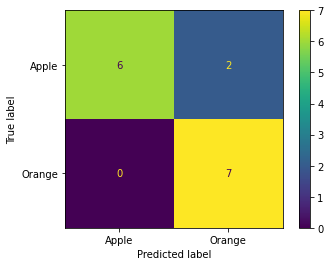

In [59]:
from sklearn.metrics import plot_confusion_matrix
_ = plot_confusion_matrix(knn,x_test,y_test)